<a href="https://colab.research.google.com/github/RAVIKUMARBALIJA/tensorflow2_tutorials/blob/main/vgg16_tranasferlearning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install -q kaggle > /dev/null

In [ ]:
from google.colab import files

In [ ]:
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"ravikumarbalija1","key":"4443a2f15f140c445c88ad0153e87c27"}'}

In [ ]:
! mkdir ~/.kaggle

In [ ]:
! cp kaggle.json ~/.kaggle/

In [ ]:
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
 ! kaggle datasets list

ref                                                           title                                              size  lastUpdated          downloadCount  
------------------------------------------------------------  ------------------------------------------------  -----  -------------------  -------------  
gpreda/reddit-vaccine-myths                                   Reddit Vaccine Myths                              233KB  2021-07-07 19:18:09           8928  
crowww/a-large-scale-fish-dataset                             A Large Scale Fish Dataset                          3GB  2021-04-28 17:03:01           5475  
imsparsh/musicnet-dataset                                     MusicNet Dataset                                   22GB  2021-02-18 14:12:19           1965  
dhruvildave/wikibooks-dataset                                 Wikibooks Dataset                                   2GB  2021-07-03 18:37:20           2368  
promptcloud/careerbuilder-job-listing-2020                    Ca

In [ ]:
!kaggle datasets download -d moltean/fruits

 99% 756M/760M [00:06<00:00, 139MB/s]
100% 760M/760M [00:06<00:00, 120MB/s]


In [ ]:
import os 
import zipfile

In [ ]:
import glob

In [ ]:
zipref=zipfile.ZipFile('/content/fruits.zip','r')

In [ ]:
zipref.extractall()

In [ ]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [ ]:
import tensorflow as tf
import keras as keras
from keras.preprocessing import image

In [ ]:
from keras.preprocessing.image import ImageDataGenerator
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.losses import MeanSquaredError,CategoricalCrossentropy
from keras.metrics import accuracy

In [ ]:
train_dir='/content/fruits-360/Training'
test_dir='/content/fruits-360/Test'

In [ ]:
train_files=glob.glob(train_dir+'/*/*.jp*g')
test_files=glob.glob(test_dir+'/*/*.jp*g')

In [ ]:
f=train_files[1]

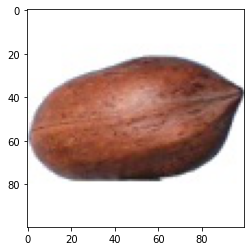

In [ ]:
"""
img1=mpimg.imread(open(train_files[1],'rb'))
plt.imshow(img1)
"""
img1=image.load_img(np.random.choice(train_files))
plt.imshow(img1)

In [ ]:
img1.shape

(100, 100, 3)

In [ ]:
IMAGE_SIZE=[100,100]
EPOCHS=5
BATCH_SIZE=32

In [ ]:
folders=glob.glob(train_dir+'/*')

In [ ]:
vgg=VGG16(include_top=False,weights='imagenet',input_shape=IMAGE_SIZE+[3])

58900480/58889256 [==============================] - 1s 0us/step


In [ ]:
for layer in vgg.layers:
  print(layer.name,layer)

input_1 <keras.engine.input_layer.InputLayer object at 0x7fa1e7c931d0>
block1_conv1 <keras.layers.convolutional.Conv2D object at 0x7fa1e1254310>
block1_conv2 <keras.layers.convolutional.Conv2D object at 0x7fa1e12cac50>
block1_pool <keras.layers.pooling.MaxPooling2D object at 0x7fa1e11ee210>
block2_conv1 <keras.layers.convolutional.Conv2D object at 0x7fa1e134b710>
block2_conv2 <keras.layers.convolutional.Conv2D object at 0x7fa1dd1a1690>
block2_pool <keras.layers.pooling.MaxPooling2D object at 0x7fa1dd1a8b50>
block3_conv1 <keras.layers.convolutional.Conv2D object at 0x7fa1dd1ab650>
block3_conv2 <keras.layers.convolutional.Conv2D object at 0x7fa1e12488d0>
block3_conv3 <keras.layers.convolutional.Conv2D object at 0x7fa1dd1bb110>
block3_pool <keras.layers.pooling.MaxPooling2D object at 0x7fa1dd1b4190>
block4_conv1 <keras.layers.convolutional.Conv2D object at 0x7fa1dd1ab510>
block4_conv2 <keras.layers.convolutional.Conv2D object at 0x7fa1e11ee390>
block4_conv3 <keras.layers.convolutional.Con

In [ ]:
for layer in vgg.layers:
  layer.trainable=False

In [ ]:
vgg.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 100, 100, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 100, 100, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 100, 100, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 50, 50, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 50, 50, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 50, 50, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 25, 25, 128)       0     

In [ ]:
x=keras.layers.Flatten()(vgg.output)
prediction=keras.layers.Dense(len(folders),activation='softmax')(x)
model=keras.models.Model(vgg.input,prediction)

In [ ]:
model.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 100, 100, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 100, 100, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 100, 100, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 50, 50, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 50, 50, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 50, 50, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 25, 25, 128)       0   

In [ ]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
train_data_generator=ImageDataGenerator(rotation_range=0.2,
                                        width_shift_range=0.2,
                                        height_shift_range=0.2,
                                        zoom_range=0.2,
                                        fill_mode='nearest',
                                        horizontal_flip=True,
                                        rescale=1.0/255,
                                        validation_split=0.3,
                                        preprocessing_function=preprocess_input)

In [ ]:
test_data_generator=ImageDataGenerator(rescale=1.0/255)

In [ ]:
train_gen=train_data_generator.flow_from_directory(train_dir,target_size=IMAGE_SIZE,batch_size=BATCH_SIZE)
test_gen=test_data_generator.flow_from_directory(test_dir,target_size=IMAGE_SIZE,batch_size=BATCH_SIZE)

Found 67692 images belonging to 131 classes.
Found 22688 images belonging to 131 classes.


In [ ]:
labels=[None]*len(train_gen.class_indices)

In [ ]:
for k,v in train_gen.class_indices.items():
  labels[v]=k

In [ ]:
len(labels)

131

min : 0.0  max : 1.0


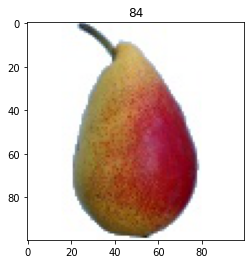

In [ ]:
for x,y in test_gen:
  print('min :',x[0].min(),' max :',x[0].max())
  plt.title(np.argmax(y[0]))
  plt.imshow(x[0])
  plt.show()
  break

In [ ]:
history=model.fit_generator(train_gen,steps_per_epoch=len(train_files)/BATCH_SIZE,epochs=1,validation_data=test_gen,
                            validation_steps=len(test_files)/BATCH_SIZE)

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1915: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


2115/2115 [==============================] - 8043s 4s/step - loss: 0.5995 - accuracy: 0.8674 - val_loss: 4.3413 - val_accuracy: 0.3398


In [ ]:
model.save('vgg16.h5')

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
test_gen_predict=model.predict(test_gen)

In [ ]:
predictions=np.argmax(test_gen_predict,axis=1)

In [ ]:
y_true=test_gen.classes

In [ ]:
cm=confusion_matrix(y_true,predictions)

In [ ]:
import seaborn as sns

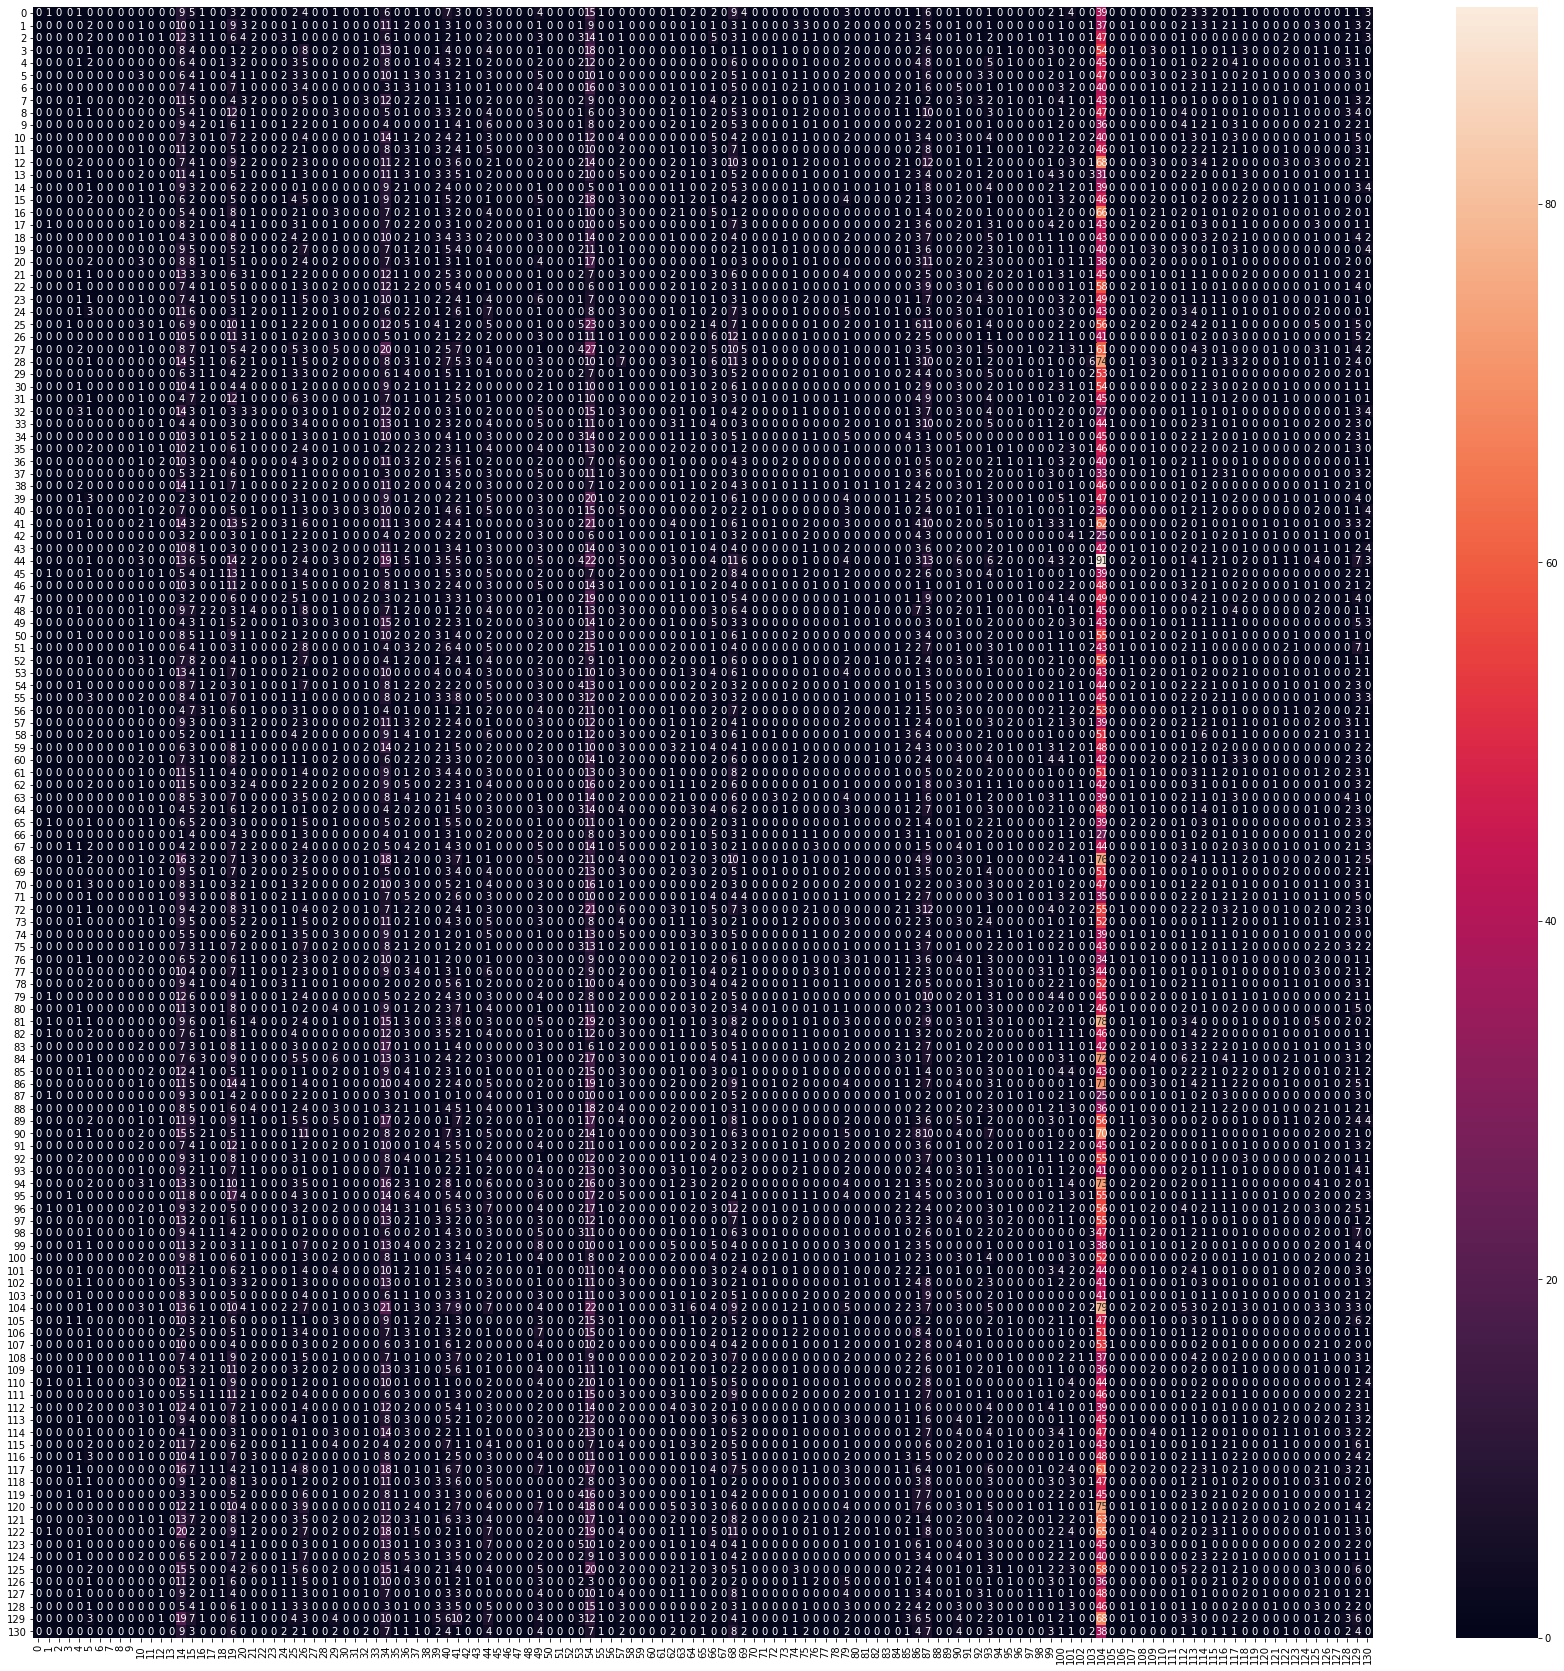

In [ ]:
plt.figure(figsize=(30,30))
sns.heatmap(cm,annot=True,)

In [ ]:
cm[:10,:10].shape

(10, 10)

In [ ]:
def get_confusion_matrix(cm,n):
  return cm[:n,:n]

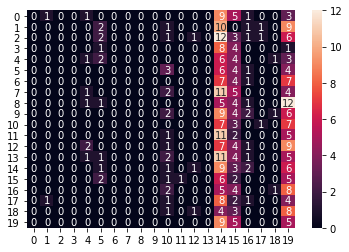

In [ ]:
sns.heatmap(get_confusion_matrix(cm,20),annot=True)

In [ ]:
labels[19]

'Beetroot'

In [ ]:
labels[:14]

['Apple Braeburn',
 'Apple Crimson Snow',
 'Apple Golden 1',
 'Apple Golden 2',
 'Apple Golden 3',
 'Apple Granny Smith',
 'Apple Pink Lady',
 'Apple Red 1',
 'Apple Red 2',
 'Apple Red 3',
 'Apple Red Delicious',
 'Apple Red Yellow 1',
 'Apple Red Yellow 2',
 'Apricot']